In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('processed_data.csv')
df.head()


,Time,Cache_id,cache_time,no,cache_next,cache_occurance
0,2020-05-22 05:55:46.378307,2,1.0,0,2.0,1
1,2020-05-22 05:58:46.378307,16,181.0,1,32.0,1
2,2020-05-22 06:01:46.378307,2,361.0,2,4.0,2
3,2020-05-22 06:04:46.378307,20,541.0,3,138.0,1
4,2020-05-22 06:07:46.378307,2,721.0,4,5.0,3


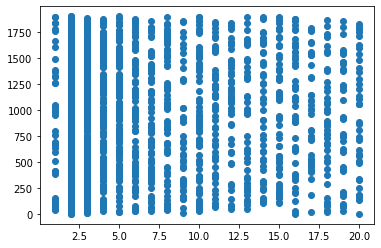

In [3]:
plt.scatter(df['Cache_id'],df['no'])

In [36]:
km = KMeans(n_clusters=150)
km


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=150, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
y_predicted = km.fit_predict(df[['no', 'Cache_id']])
y_predicted


array([  9, 132,   9, ..., 127, 127, 127])

In [38]:
df['cluster'] = y_predicted
df.head()


,Time,Cache_id,cache_time,no,cache_next,cache_occurance,cluter,cluster
0,2020-05-22 05:55:46.378307,2,1.0,0,2.0,1,2,9
1,2020-05-22 05:58:46.378307,16,181.0,1,32.0,1,2,132
2,2020-05-22 06:01:46.378307,2,361.0,2,4.0,2,2,9
3,2020-05-22 06:04:46.378307,20,541.0,3,138.0,1,2,132
4,2020-05-22 06:07:46.378307,2,721.0,4,5.0,3,2,9


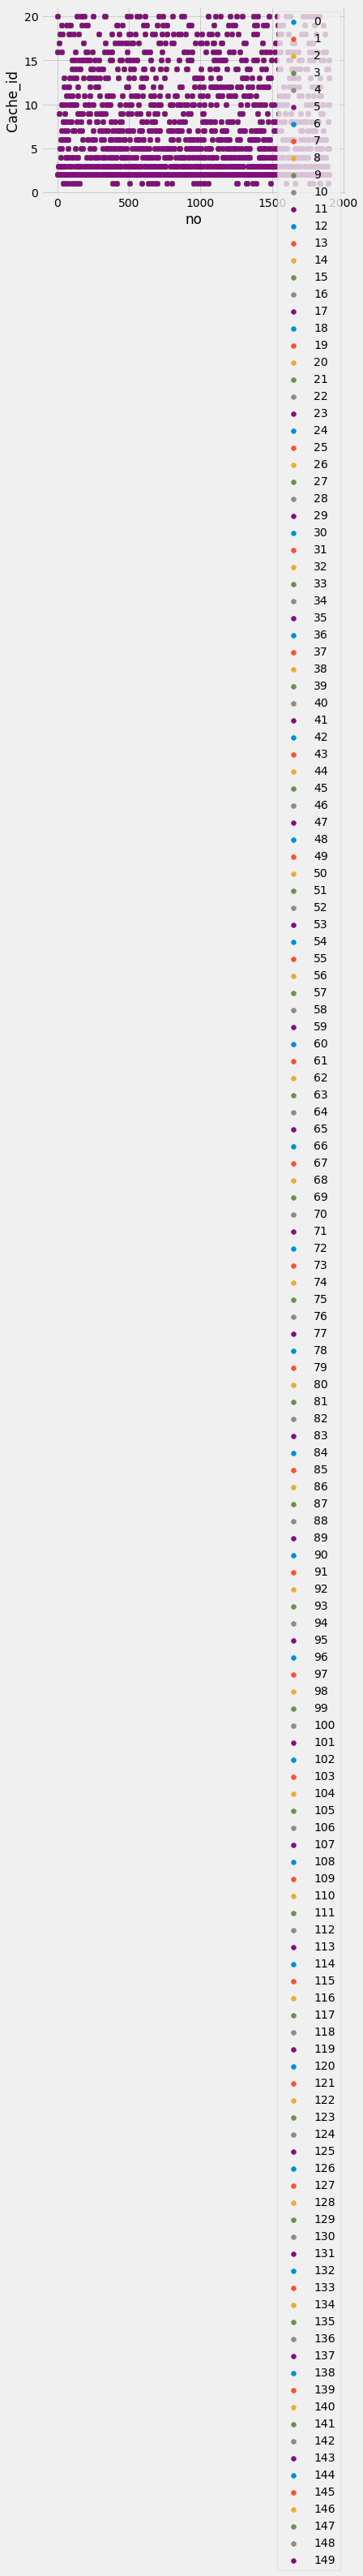

In [39]:
plt.style.use('fivethirtyeight')
s = set(y_predicted)
d_set = []
for cluster in s:
    d_set.append(df[df['cluster']==cluster])
col = ['g','r','b','m','c','k','purple', 'olive', 'lime', 'orange']
s = 0
for cluster in d_set:
    #plt.scatter(df['no'],df['Cache_id'],color=col[s], label=s)
    plt.scatter(df['no'],df['Cache_id'], label=s)
    s+=1
# df1 = df[df.cluster==0]
# df2 = df[df.cluster==1]
# df3 = df[df.cluster==2]
# plt.scatter(df1.Age,df1[ 'Income($)'],color='green')
# plt.scatter(df2.Age,df2['Income($)'],color='red')
# plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.xlabel('no')
plt.ylabel('Cache_id')
plt.legend()


In [41]:
for i in d_set:
    a = set(i['Cache_id'])
    if len(a) <= 6:
        print(a)
    

{9, 13, 15, 17, 20}
{17, 19, 15}
{2, 4, 5, 6, 7, 11}
{11, 10, 2, 3}
{10, 11, 14, 15, 16, 18}
{2, 3, 4, 6, 7}
{9, 2, 3, 5}
{1, 2, 4, 5, 10}
{2, 3, 4, 6, 7, 15}
{1, 2, 3, 6, 12, 13}
{2, 3, 4, 5, 7, 8}
{1, 2, 3, 4, 8}
{1, 2, 3, 5, 14}
{1, 2, 3, 4, 5, 14}
{2, 3, 4, 5, 7, 8}
{2, 3, 4, 5, 8}
{17, 18, 11, 20}
{1, 2, 3, 5, 9, 14}
{2, 3, 5, 6, 11, 14}
{2, 3, 6, 9, 13, 14}
{11, 2, 3, 4}
{1, 2, 3, 6, 7}
{2, 3, 4, 5, 9, 13}
{2, 3, 4, 6}
{2, 3, 7, 9, 11}
{2, 3, 4, 6, 8}
{2, 3, 4, 7, 11}
{2, 3, 4, 7, 8, 12}
{1, 2, 3, 5}
{16, 19, 15}
{2, 3, 4, 5, 8, 9}
{2, 3, 4, 5, 7, 8}
{2, 3, 4, 6, 14}
{16, 19, 14, 15}
{16, 19, 12, 14}
{2, 3, 5}
{2, 3, 5, 6, 11, 13}
{17, 11, 12, 15}
{2, 3, 4, 6}
{1, 2, 3, 4, 7, 8}
{2, 3, 10, 11, 12, 13}
{2, 3, 4, 5, 8, 13}
{2, 3, 4, 5, 8, 16}
{1, 2, 3, 4, 5}
{12, 15, 16, 17, 18, 19}
{16, 17, 20}
{2, 3, 5}
{2, 3, 4, 5, 7}
{11, 15, 17, 19, 20}
{10, 11, 12, 13, 18, 19}
{13, 14, 16, 18, 19, 20}
{11, 14, 15, 17, 18, 19}
{1, 2, 3, 6, 7, 10}
{16, 17, 18, 20}
{16, 13, 12, 20}
{2, 3, 7}
{1,

In [5]:
df_new = pd.read_csv('processed_data.csv')

scaler = MinMaxScaler()
scaler.fit(df_new[['Cache_id']])
df_new['Cache_id'] = scaler.transform(df_new[['Cache_id']])

scaler.fit(df_new[['no']])
df_new['no'] = scaler.transform(df_new[['no']])
df_new


,Time,Cache_id,cache_time,no,cache_next,cache_occurance
0,2020-05-22 05:55:46.378307,0.052632,1.0,0.000000,2.0,1
1,2020-05-22 05:58:46.378307,0.789474,181.0,0.000526,32.0,1
2,2020-05-22 06:01:46.378307,0.052632,361.0,0.001052,4.0,2
3,2020-05-22 06:04:46.378307,1.000000,541.0,0.001578,138.0,1
4,2020-05-22 06:07:46.378307,0.052632,721.0,0.002104,5.0,3
...,...,...,...,...,...,...
1897,2020-05-26 04:46:46.378307,0.736842,341461.0,0.997896,1923.0,59
1898,2020-05-26 04:49:46.378307,0.473684,341641.0,0.998422,1903.0,69
1899,2020-05-26 04:52:46.378307,0.052632,341821.0,0.998948,1901.0,554
1900,2020-05-26 04:55:46.378307,0.210526,342001.0,0.999474,1925.0,117


In [6]:
km = KMeans(n_clusters=150)
y_predicted = km.fit_predict(df_new[['no', 'Cache_id']])
y_predicted


array([116, 109, 116, ...,  58,  23,  58])

In [8]:
df_new['cluster'] = y_predicted
df_new.head()

,Time,Cache_id,cache_time,no,cache_next,cache_occurance,cluster
0,2020-05-22 05:55:46.378307,0.052632,1.0,0.000000,2.0,1,116
1,2020-05-22 05:58:46.378307,0.789474,181.0,0.000526,32.0,1,109
2,2020-05-22 06:01:46.378307,0.052632,361.0,0.001052,4.0,2,116
3,2020-05-22 06:04:46.378307,1.000000,541.0,0.001578,138.0,1,133
4,2020-05-22 06:07:46.378307,0.052632,721.0,0.002104,5.0,3,116


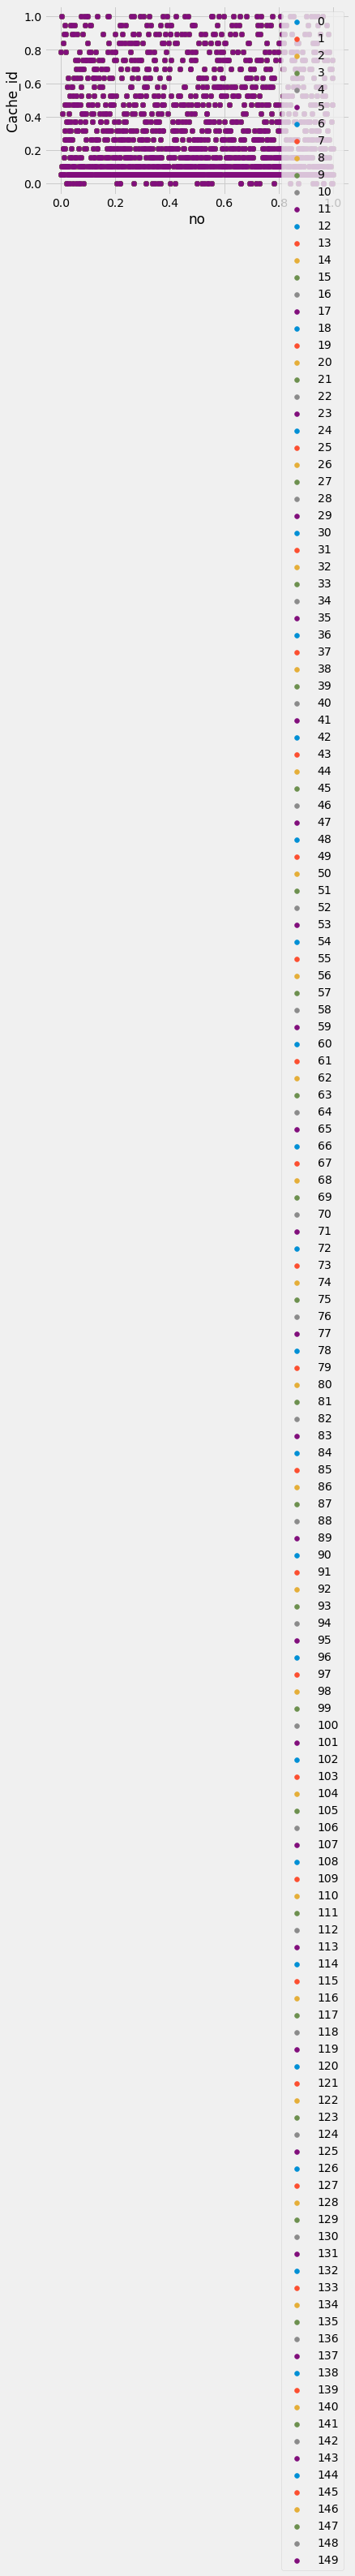

In [10]:
plt.style.use('fivethirtyeight')
s = set(y_predicted)
d_set = []
for cluster in s:
    d_set.append(df_new[df_new['cluster']==cluster])
col = ['g','r','b','m','c','k','purple', 'olive', 'lime', 'orange']
s = 0
for cluster in d_set:
    #plt.scatter(df['no'],df['Cache_id'],color=col[s], label=s)
    plt.scatter(df_new['no'],df_new['Cache_id'], label=s)
    s+=1

plt.xlabel('no')
plt.ylabel('Cache_id')
plt.legend()


In [11]:
for i in d_set:
    a = set(i['Cache_id'])
    if len(a) <= 6:
        print(a)

{0.3684210526315789}
{0.2631578947368421, 0.3157894736842105}
{0.894736842105263}
{0.05263157894736842, 0.0}
{0.10526315789473684}
{0.7894736842105263, 0.736842105263158}
{0.631578947368421, 0.5789473684210527}
{0.05263157894736842}
{0.05263157894736842, 0.0}
{0.3684210526315789, 0.42105263157894735}
{0.631578947368421, 0.6842105263157894}
{0.894736842105263, 0.8421052631578947}
{0.10526315789473684}
{0.9473684210526316, 1.0}
{0.47368421052631576, 0.42105263157894735}
{0.736842105263158, 0.7894736842105263}
{0.2631578947368421}
{0.2631578947368421}
{0.47368421052631576}
{0.15789473684210525}
{0.05263157894736842, 0.0}
{0.736842105263158, 0.7894736842105263, 0.6842105263157894}
{0.47368421052631576, 0.42105263157894735}
{0.21052631578947367, 0.15789473684210525}
{0.10526315789473684}
{0.05263157894736842, 0.0}
{0.736842105263158, 0.7894736842105263}
{0.42105263157894735, 0.3684210526315789}
{0.15789473684210525}
{0.15789473684210525}
{0.2631578947368421}
{0.05263157894736842, 0.0}
{0.84

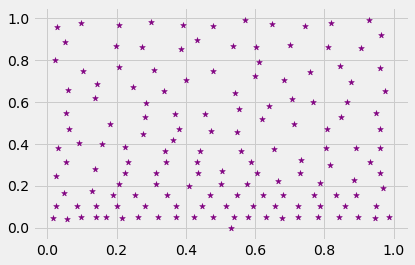

In [12]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*', label='centroid')


In [15]:
k_rng = range(1,150)

sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km. fit(df_new[['no', 'Cache_id']])
    sse.append(km.inertia_)


# Elbow Plot

In [16]:
sse

[309.9281601788417,
 189.08484204049887,
 98.72109832979137,
 70.05707757147854,
 54.15240967649519,
 45.64015957760219,
 38.95314395519051,
 34.077026115495684,
 29.635318820933506,
 26.073606823660842,
 23.805894253345272,
 21.747128531937502,
 19.943430099630966,
 18.41383406796738,
 17.327147255930544,
 16.122340972692506,
 15.170720721471302,
 14.264804849998692,
 13.459824495938712,
 12.680448655605367,
 12.071377775923303,
 11.447159140124604,
 10.9871507549874,
 10.31509548880005,
 9.897322451189808,
 9.42326499035162,
 9.150174545617375,
 8.677691065780948,
 8.497694542957786,
 8.088751609073544,
 7.828896057634939,
 7.643644857984167,
 7.368844748900482,
 7.1221275528948995,
 6.803103769480709,
 6.736933601792634,
 6.383488325457169,
 6.240666760989089,
 6.1926981848520555,
 5.879907512637795,
 5.836110333804752,
 5.676859511483501,
 5.465569985165009,
 5.3810325913545185,
 5.246377544053645,
 5.06550322716658,
 4.951622783475306,
 4.869609610635109,
 4.814302486526291,
 4.66

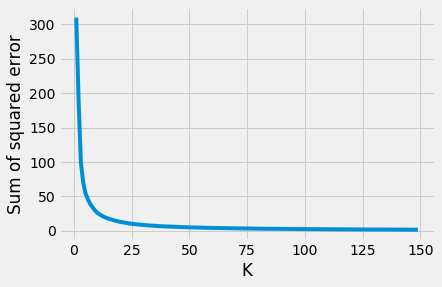

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)


In [ ]:
# https://arxiv.org/pdf/1905.07188.pdf
# https://www.youtube.com/watch?v=EItlUEPCIzM